In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

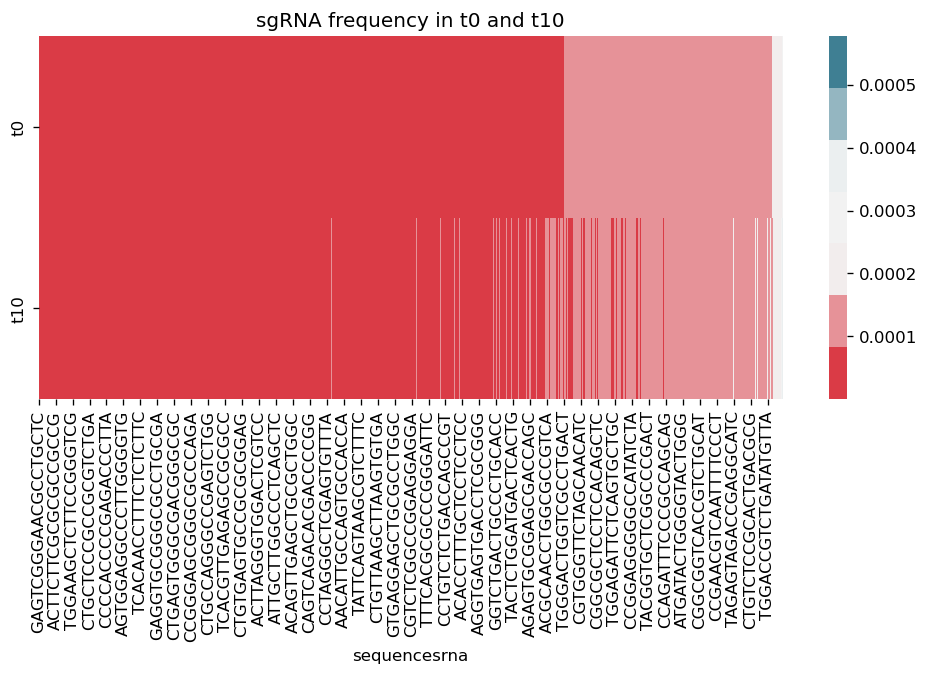

In [101]:
#heat map
df1 = pd.read_csv('result2.csv',sep=',')
plt.figure(figsize=(10,4),dpi=120)
df_heatmap = df1[['sequencesrna','freq0','freq10']]
df_heatmap.set_index(['sequencesrna'],inplace=True)
df_heatmap.columns = ['t0','t10']
df_heatmap=pd.DataFrame(df_heatmap)
df_heatmap.sort_values('t0',inplace=True)
df_heatmap_t=pd.DataFrame(df_heatmap.values.T,index=df_heatmap.columns,columns=df_heatmap.index)
sns.heatmap(data=df_heatmap_t,cmap=sns.diverging_palette(10, 220, sep=80, n=7))
plt.title('sgRNA frequency in t0 and t10')
plt.savefig('heatmap.png')

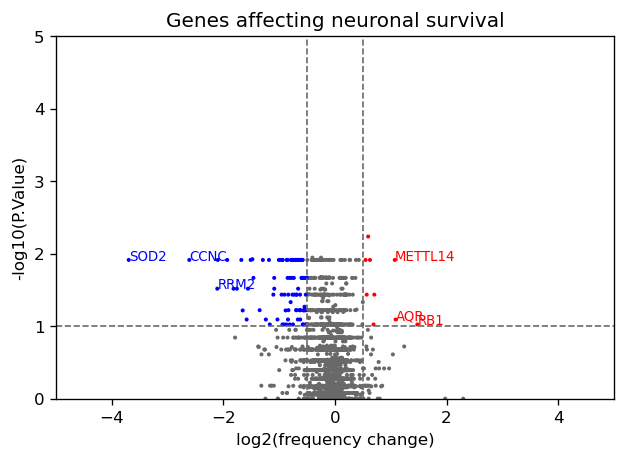

In [102]:
#volcano plot
df2 = pd.read_csv('result_for_plot.csv',sep=',')
result = pd.DataFrame()
#计算-lg(P.value)
result['logfc']=df2['MEAN']
result['lgp']= -np.log10(df2['U test'])
#添加分组信息
result['group']='dimgrey'
result['genename']=df2['Gene name']
result.loc[(result.logfc > 0.5)&(result.lgp>1),'group'] = 'red'
result.loc[(result.logfc < -0.5)&(result.lgp>1),'group'] = 'blue'
#作图
fig = plt.figure(dpi=120) 
ax = fig.add_subplot()
ax.set(xlim=(-5, 5), ylim=(0, 5), title='Genes affecting neuronal survival',xlabel='log2(frequency change)',ylabel='-log10(P.Value)')
ax.scatter(result['logfc'], result['lgp'], s=2, c=result['group'])
ax.vlines(-0.5, 0, 5,color='dimgrey',linestyle='dashed',linewidth=1)
ax.vlines(0.5, 0, 5, color='dimgrey',linestyle='dashed', linewidth=1) 
ax.hlines(1, -5, 5, color='dimgrey',linestyle='dashed', linewidth=1)
#给点加上label
label1 = result.loc[(result.logfc > 1)&(result.lgp>1)]
label2 = result.loc[(result.logfc < -1)&(result.lgp>1)]
label2=pd.DataFrame(label2)
label2.sort_values('logfc',inplace=True)
label2=label2.head(3)
for i in range(len(label1)):
    ax.text(label1.iloc[i,0],label1.iloc[i,1],label1.iloc[i,3],fontsize=8, color = 'red')
for i in range(len(label2)):
    ax.text(label2.iloc[i,0],label2.iloc[i,1],label2.iloc[i,3],fontsize=8, color = 'blue')
plt.savefig('volcanoplot.png')

In [103]:
#GO富集分析
df2.sort_values('MEAN',inplace=True)
#提取log2FC最小的100个gene作为toxic genes
df_toxic = df2.head(100)
toxic_genename = pd.DataFrame(df_toxic['Gene name'])
toxic_genename.to_csv('toxic_genename.csv',sep=',',header=False,index=False)
#提取log2FC最大的100个gene作为protective genes
df_protective = df2.tail(100)
protective_genename = pd.DataFrame(df_protective['Gene name'])
protective_genename.to_csv('protective_genename.csv',sep=',',header=False,index=False)
#使用WebGestalt（http://www.webgestalt.org/）对toxic gene和protective gene分别进行GO富集分析